In [9]:
import pandas as pd
import os
import os
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
os.chdir(r"C:\Users\Lorenzo\Documents\Uni\Ultimo semestre\Polli")
df = pd.read_excel("Polli progetto.xlsx", sheet_name="Foglio4")

serie = df["CO2"].dropna() 
result = adfuller(serie)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}") 


df2 = pd.read_excel(r"C:\Users\Lorenzo\Documents\Uni\Ultimo semestre\Polli\Polli progetto.xlsx", sheet_name="Foglio5")
serie2 = df2["GDP"].dropna()  
# Test di Dickey-Fuller
result2 = adfuller(serie2)


print("ADF Statistic gdp:", result2[0])
print("p-value gdp:", result2[1])
for key, value in result2[4].items():
    print(f"Critical Value gdp ({key}): {value}")



ADF Statistic: -0.05420946879336472
p-value: 0.9538127262276226
Critical Value (1%): -3.7238633119999998
Critical Value (5%): -2.98648896
Critical Value (10%): -2.6328004
ADF Statistic gdp: -2.8140115390512372
p-value gdp: 0.05630002530006701
Critical Value gdp (1%): -3.7238633119999998
Critical Value gdp (5%): -2.98648896
Critical Value gdp (10%): -2.6328004


In [11]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Differenziazione prima serie (CO2)
co2_diff = serie.diff().dropna()
adf_co2_diff = adfuller(co2_diff)

# Differenziazione seconda serie (GDP)
gdp_diff = serie2.diff().dropna()
adf_gdp_diff = adfuller(gdp_diff)
# Stampa i risultati della differenziazione
print("Differenziazione CO2 - ADF Statistic:", adf_co2_diff[0])
print("Differenziazione CO2 - p-value:", adf_co2_diff[1])
for key, value in adf_co2_diff[4].items():
    print(f"Differenziazione CO2 - Critical Value ({key}): {value}")    

print("Differenziazione GDP - ADF Statistic:", adf_gdp_diff[0])
print("Differenziazione GDP - p-value:", adf_gdp_diff[1])       
for key, value in adf_gdp_diff[4].items():
    print(f"Differenziazione GDP - Critical Value ({key}): {value}")
    




Differenziazione CO2 - ADF Statistic: -4.8788408971802415
Differenziazione CO2 - p-value: 3.8336995471363774e-05
Differenziazione CO2 - Critical Value (1%): -3.7377092158564813
Differenziazione CO2 - Critical Value (5%): -2.9922162731481485
Differenziazione CO2 - Critical Value (10%): -2.635746736111111
Differenziazione GDP - ADF Statistic: -3.971099264365803
Differenziazione GDP - p-value: 0.001569638611929971
Differenziazione GDP - Critical Value (1%): -3.7529275211638033
Differenziazione GDP - Critical Value (5%): -2.998499866852963
Differenziazione GDP - Critical Value (10%): -2.6389669754253307


In [12]:

# ARMA(p=1, q=1)
model_co2 = ARIMA(co2_diff, order=(1, 0, 1))
result_co2 = model_co2.fit()

print(result_co2.summary())
model_gdp = ARIMA(gdp_diff, order=(1, 0, 1))
result_gdp = model_gdp.fit()

print(result_gdp.summary())
from statsmodels.stats.diagnostic import acorr_ljungbox

# Test Ljung-Box per residui
ljung_co2 = acorr_ljungbox(result_co2.resid, lags=[10], return_df=True)
print(ljung_co2)




                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                   25
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -105.859
Date:                Fri, 20 Feb 2026   AIC                            219.718
Time:                        17:28:48   BIC                            224.593
Sample:                             0   HQIC                           221.070
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9772      5.166     -0.770      0.441     -14.102       6.148
ar.L1          0.7258      1.888      0.384      0.701      -2.975       4.426
ma.L1         -0.6792      1.987     -0.342      0.7

In [13]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

model_co2_arma21 = ARIMA(co2_diff, order=(2, 0, 1))
result_co2_arma21 = model_co2_arma21.fit()
print("\n=== ARMA(2,1) per CO2 ===")
print(result_co2_arma21.summary())


model_co2_arma12 = ARIMA(co2_diff, order=(1, 0, 2))
result_co2_arma12 = model_co2_arma12.fit()
print("\n=== ARMA(1,2) per CO2 ===")
print(result_co2_arma12.summary())


model_gdp_arma21 = ARIMA(gdp_diff, order=(2, 0, 1))
result_gdp_arma21 = model_gdp_arma21.fit()
print("\n=== ARMA(2,1) per GDP ===")
print(result_gdp_arma21.summary())


model_gdp_arma12 = ARIMA(gdp_diff, order=(1, 0, 2))
result_gdp_arma12 = model_gdp_arma12.fit()
print("\n=== ARMA(1,2) per GDP ===")
print(result_gdp_arma12.summary())




=== ARMA(2,1) per CO2 ===
                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                   25
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -105.635
Date:                Fri, 20 Feb 2026   AIC                            221.270
Time:                        17:29:19   BIC                            227.365
Sample:                             0   HQIC                           222.961
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5984      6.175     -0.583      0.560     -15.700       8.503
ar.L1          0.5100      1.494      0.341      0.733      -2.418       3.438
ar.L2          0.1432    

📊 Test di Ljung-Box su co2_diff:
     lb_stat  lb_pvalue
10  5.785072   0.832986


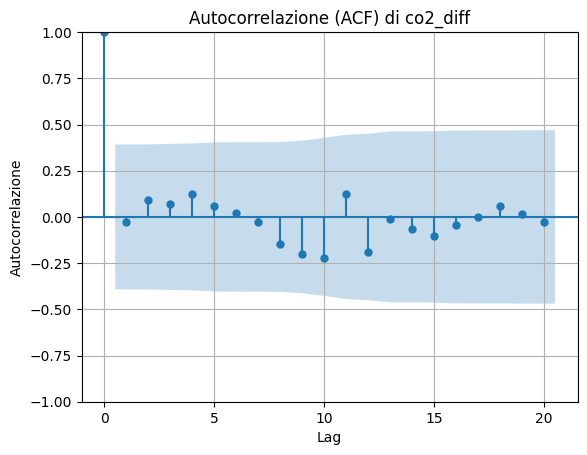

Test di Ljung-Box su co2_diff:
     lb_stat  lb_pvalue
10  4.809902    0.90351


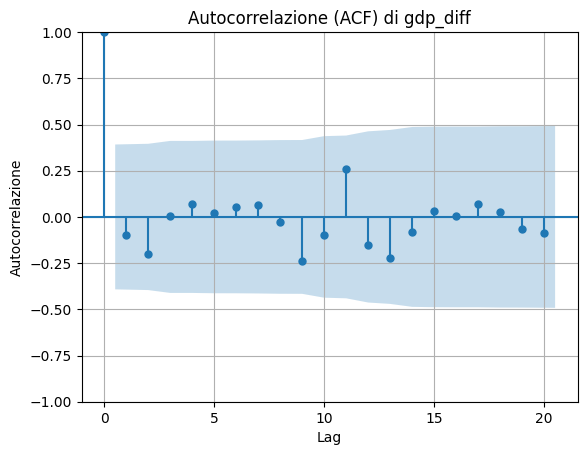

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf


co2_diff = pd.Series(co2_diff)

# Test di Ljung-Box per il rumore bianco
lb_test = acorr_ljungbox(co2_diff, lags=[10], return_df=True)

print(" Test di Ljung-Box su co2_diff:")
print(lb_test)


plot_acf(co2_diff, lags=20)
plt.title("Autocorrelazione (ACF) di co2_diff")
plt.xlabel("Lag")
plt.ylabel("Autocorrelazione")
plt.grid(True)
plt.show()


co2_diff = pd.Series(gdp_diff)


lb_test_gdp = acorr_ljungbox(gdp_diff, lags=[10], return_df=True)

print("Test di Ljung-Box su co2_diff:")
print(lb_test_gdp)



plot_acf(gdp_diff, lags=20)
plt.title("Autocorrelazione (ACF) di gdp_diff")
plt.xlabel("Lag")
plt.ylabel("Autocorrelazione")
plt.grid(True)
plt.show()



In [16]:
#CO2
# Modello costante sulla serie differenziata
model_const = ARIMA(co2_diff, order=(0, 0, 0))
result_const = model_const.fit()
print(" ARIMA(0,0,0) - Modello costante Co2:")
print(result_const.summary())

# Modello random walk sulla serie originale (non differenziata)
model_rw = ARIMA(serie, order=(0, 1, 0)) 
result_rw = model_rw.fit()
print(" ARIMA(0,1,0) - Random Walk:")
print(result_rw.summary())

#GDP
# === 1. Modello costante: ARIMA(0,0,0) sulla serie differenziata
model_const_gdp = ARIMA(gdp_diff, order=(0, 0, 0))
result_const_gdp = model_const_gdp.fit()
print(" ARIMA(0,0,0) - Modello costante per GDP differenziato:")
print(result_const_gdp.summary())

# === 2. Modello random walk: ARIMA(0,1,0) sulla serie originale
model_rw_gdp = ARIMA(serie2, order=(0, 1, 0)) 
result_rw_gdp = model_rw_gdp.fit()
print("\n ARIMA(0,1,0) - Random Walk per GDP originale:")
print(result_rw_gdp.summary())

 ARIMA(0,0,0) - Modello costante Co2:
                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   25
Model:                          ARIMA   Log Likelihood                -336.570
Date:                Fri, 20 Feb 2026   AIC                            677.140
Time:                        17:36:27   BIC                            679.578
Sample:                             0   HQIC                           677.817
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9553.8468   2.75e+05      0.035      0.972    -5.3e+05    5.49e+05
sigma2      7.553e+10   3.14e+10      2.408      0.016    1.41e+10    1.37e+11
Ljung-Box (L1)